**Install JCompl**

In [3]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 10.5 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.14-py2.py3-none-any.whl size=33654 sha256=db27fe6e533f0cfa75236558dc520ff68fe9a89fafdcc39bd25dd2eb8c21f5d2
  Stored in directory: /root/.cache/pip/wheels/d9/6a/86/9a622c06f65732afe0e31c02a92fae6ab663ffd7162bcf5125
Successfully built jcopml


**Libararies**

In [4]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataUsers = pd.read_csv('/content/drive/MyDrive/Dataset Final Project DBA/users.csv')
dataUsers.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,19279,Heidi,Jackson,heidijackson@example.org,50,F,Mie,894 Nicholas Curve Suite 865,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2020-11-07 12:40:00+00:00
1,5678,Michael,Brooks,michaelbrooks@example.org,58,M,Acre,0549 Deanna Land,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Email,2019-07-28 04:20:00+00:00
2,29694,Scott,Anderson,scottanderson@example.org,60,M,Acre,8979 Stephens Oval Apt. 816,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Facebook,2019-08-16 17:06:00+00:00
3,29967,Mike,Beck,mikebeck@example.org,12,M,Acre,76404 Michael Way Apt. 377,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-05-09 12:08:00+00:00
4,47096,Holly,Kennedy,hollykennedy@example.org,68,F,Acre,23658 Santana Mission,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-05-24 15:53:00+00:00


In [7]:
dataUsers = dataUsers[['id','gender']] 

In [8]:
dataUsers

,id,gender
0,19279,F
1,5678,M
2,29694,M
3,29967,M
4,47096,F
...,...,...
99995,91847,F
99996,12802,F
99997,28309,M
99998,35063,F


In [9]:
dataEvents = pd.read_csv('/content/drive/MyDrive/Dataset Final Project DBA/events.csv')
dataEvents.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,252,14.0,1,4ee0d7d3-ed29-4b1c-b038-1e3f78942acd,2020-08-18 08:46:32+00:00,138.65.151.151,Daejeon,Daejeon,302-160,Chrome,Email,/home,home
1,4473,301.0,1,a77d6232-0a03-4616-b836-446a32b9e4f4,2020-08-19 03:47:46+00:00,153.204.205.22,São Luís,Maranhão,65000-000,IE,Email,/home,home
2,5756,401.0,1,0e517fbd-e152-4918-8f01-6036a180813c,2020-06-07 07:03:58+00:00,209.47.200.122,Sant Adrià de Besòs,Cataluña,8930,Chrome,Email,/home,home
3,8944,683.0,1,4c2fada8-7095-4de2-9728-31c0eed658b0,2020-09-23 04:52:13+00:00,60.42.59.118,Inhambupe,Bahia,48490-000,Chrome,Email,/home,home
4,9164,709.0,1,5a9c26be-01e9-4918-a908-77476667faa2,2021-07-29 16:05:33+00:00,194.208.170.21,Bayreuth,Bayern,95448,IE,Email,/home,home


In [10]:
dataEvents = dataEvents[['user_id','created_at','event_type']] 
dataEvents

,user_id,created_at,event_type
0,14.0,2020-08-18 08:46:32+00:00,home
1,301.0,2020-08-19 03:47:46+00:00,home
2,401.0,2020-06-07 07:03:58+00:00,home
3,683.0,2020-09-23 04:52:13+00:00,home
4,709.0,2021-07-29 16:05:33+00:00,home
...,...,...,...
2418729,60380.0,2022-02-25 08:13:04+00:00,purchase
2418730,65033.0,2020-11-23 02:23:01+00:00,purchase
2418731,78525.0,2020-10-23 09:58:38+00:00,purchase
2418732,84310.0,2021-08-30 02:15:53+00:00,purchase


In [11]:
dataset = pd.merge(dataUsers, dataEvents, how ='left', left_on='id', right_on='user_id') #LEFT JOIN USER DAN EVENT
dataset.head(1000) #TAMPILIN DATA SEJUMLAH 1000

,id,gender,user_id,created_at,event_type
0,19279,F,19279.0,2022-05-06 09:18:24+00:00,department
1,19279,F,19279.0,2022-05-06 11:09:56+00:00,department
2,19279,F,19279.0,2022-05-06 09:20:32+00:00,product
3,19279,F,19279.0,2022-05-06 11:11:51+00:00,product
4,19279,F,19279.0,2022-05-06 09:20:34+00:00,cart
...,...,...,...,...,...
995,11787,M,11787.0,2020-01-29 02:22:42+00:00,purchase
996,23267,F,23267.0,2021-07-16 09:51:00+00:00,home
997,23267,F,23267.0,2021-07-16 09:52:35+00:00,department
998,23267,F,23267.0,2021-07-16 09:55:07+00:00,product


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313250 entries, 0 to 1313249
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1313250 non-null  int64  
 1   gender      1313250 non-null  object 
 2   user_id     1293236 non-null  float64
 3   created_at  1293236 non-null  object 
 4   event_type  1293236 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 60.1+ MB


In [13]:
dataset['created_at'] = pd.to_datetime(dataset['created_at'])

In [14]:
dataset

,id,gender,user_id,created_at,event_type
0,19279,F,19279.0,2022-05-06 09:18:24+00:00,department
1,19279,F,19279.0,2022-05-06 11:09:56+00:00,department
2,19279,F,19279.0,2022-05-06 09:20:32+00:00,product
3,19279,F,19279.0,2022-05-06 11:11:51+00:00,product
4,19279,F,19279.0,2022-05-06 09:20:34+00:00,cart
...,...,...,...,...,...
1313245,43199,F,43199.0,2021-12-16 10:26:07+00:00,product
1313246,43199,F,43199.0,2021-04-24 09:33:37+00:00,cart
1313247,43199,F,43199.0,2021-12-16 10:26:51+00:00,cart
1313248,43199,F,43199.0,2021-04-24 09:36:09+00:00,purchase


In [15]:
dataset['yyyy'] = pd.to_datetime(dataset['created_at']).dt.year
dataset['mm'] = pd.to_datetime(dataset['created_at']).dt.month
dataset['dd'] = pd.to_datetime(dataset['created_at']).dt.day

In [16]:
dataset

,id,gender,user_id,created_at,event_type,yyyy,mm,dd
0,19279,F,19279.0,2022-05-06 09:18:24+00:00,department,2022.0,5.0,6.0
1,19279,F,19279.0,2022-05-06 11:09:56+00:00,department,2022.0,5.0,6.0
2,19279,F,19279.0,2022-05-06 09:20:32+00:00,product,2022.0,5.0,6.0
3,19279,F,19279.0,2022-05-06 11:11:51+00:00,product,2022.0,5.0,6.0
4,19279,F,19279.0,2022-05-06 09:20:34+00:00,cart,2022.0,5.0,6.0
...,...,...,...,...,...,...,...,...
1313245,43199,F,43199.0,2021-12-16 10:26:07+00:00,product,2021.0,12.0,16.0
1313246,43199,F,43199.0,2021-04-24 09:33:37+00:00,cart,2021.0,4.0,24.0
1313247,43199,F,43199.0,2021-12-16 10:26:51+00:00,cart,2021.0,12.0,16.0
1313248,43199,F,43199.0,2021-04-24 09:36:09+00:00,purchase,2021.0,4.0,24.0


In [17]:
def label_race (row):
   if row['mm'] == row['dd']  :
      return 'Tertarik'
   return 'Kurang_Tertarik'

In [18]:
dataset['label'] = dataset.apply (lambda row: label_race(row), axis=1)

In [19]:
dataset

,id,gender,user_id,created_at,event_type,yyyy,mm,dd,label
0,19279,F,19279.0,2022-05-06 09:18:24+00:00,department,2022.0,5.0,6.0,Kurang_Tertarik
1,19279,F,19279.0,2022-05-06 11:09:56+00:00,department,2022.0,5.0,6.0,Kurang_Tertarik
2,19279,F,19279.0,2022-05-06 09:20:32+00:00,product,2022.0,5.0,6.0,Kurang_Tertarik
3,19279,F,19279.0,2022-05-06 11:11:51+00:00,product,2022.0,5.0,6.0,Kurang_Tertarik
4,19279,F,19279.0,2022-05-06 09:20:34+00:00,cart,2022.0,5.0,6.0,Kurang_Tertarik
...,...,...,...,...,...,...,...,...,...
1313245,43199,F,43199.0,2021-12-16 10:26:07+00:00,product,2021.0,12.0,16.0,Kurang_Tertarik
1313246,43199,F,43199.0,2021-04-24 09:33:37+00:00,cart,2021.0,4.0,24.0,Kurang_Tertarik
1313247,43199,F,43199.0,2021-12-16 10:26:51+00:00,cart,2021.0,12.0,16.0,Kurang_Tertarik
1313248,43199,F,43199.0,2021-04-24 09:36:09+00:00,purchase,2021.0,4.0,24.0,Kurang_Tertarik


In [20]:
dataset = dataset.drop(['yyyy', 'mm', 'dd'], axis=1)
dataset.head()

,id,gender,user_id,created_at,event_type,label
0,19279,F,19279.0,2022-05-06 09:18:24+00:00,department,Kurang_Tertarik
1,19279,F,19279.0,2022-05-06 11:09:56+00:00,department,Kurang_Tertarik
2,19279,F,19279.0,2022-05-06 09:20:32+00:00,product,Kurang_Tertarik
3,19279,F,19279.0,2022-05-06 11:11:51+00:00,product,Kurang_Tertarik
4,19279,F,19279.0,2022-05-06 09:20:34+00:00,cart,Kurang_Tertarik


In [21]:
dataset.label.value_counts()

Kurang_Tertarik    1274539
Tertarik             38711
Name: label, dtype: int64

Pada modeling program ini, menggunakan dataset yang telah dilakukan inner join sebelumnya. 2 Tabel dataset yang digunakan ialah Tabel user dan events. Selanjutnya, dataset tersebut diberikan label Tertarik dan Kurang Tertarik. Adapun kurang 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


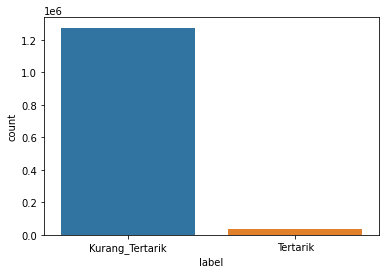

In [22]:
sns.countplot(dataset['label'])

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313250 entries, 0 to 1313249
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   id          1313250 non-null  int64              
 1   gender      1313250 non-null  object             
 2   user_id     1293236 non-null  float64            
 3   created_at  1293236 non-null  datetime64[ns, UTC]
 4   event_type  1293236 non-null  object             
 5   label       1313250 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 70.1+ MB


In [24]:
dataset['created_at'] = pd.to_datetime(dataset['created_at'])

In [25]:
#Mengecek Missing Value
dataset.isnull().sum()

id                0
gender            0
user_id       20014
created_at    20014
event_type    20014
label             0
dtype: int64

In [26]:
dataset = dataset.fillna({
               'event_type': 'no_event'
})

In [27]:
dataset = dataset.fillna(method='ffill', axis='columns')

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313250 entries, 0 to 1313249
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   id          1313250 non-null  object
 1   gender      1313250 non-null  object
 2   user_id     1313250 non-null  object
 3   created_at  1313250 non-null  object
 4   event_type  1313250 non-null  object
 5   label       1313250 non-null  object
dtypes: object(6)
memory usage: 70.1+ MB


In [29]:
dataset.isnull().sum()

id            0
gender        0
user_id       0
created_at    0
event_type    0
label         0
dtype: int64

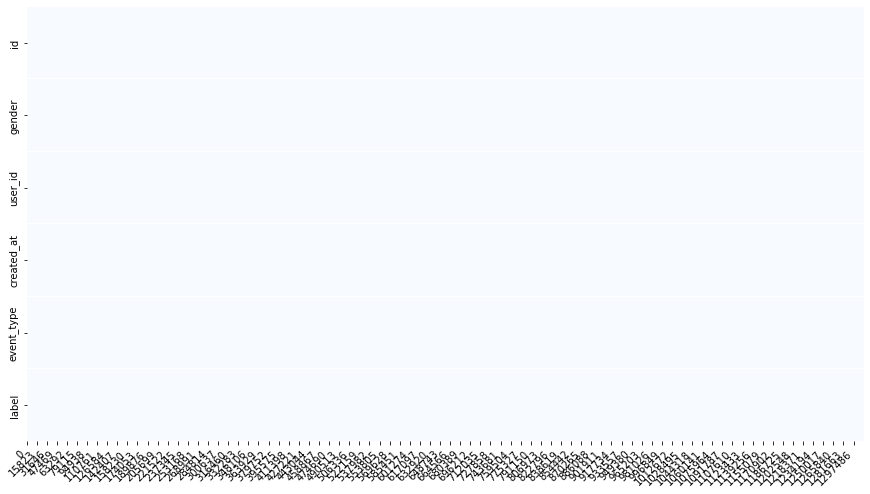

In [30]:
plot_missing_value(dataset)

In [31]:
dataset.duplicated().sum()

172

In [32]:
dataset= dataset.drop_duplicates()

In [33]:
dataset.duplicated().sum()

0

In [34]:
dataset

,id,gender,user_id,created_at,event_type,label
0,19279,F,19279.0,2022-05-06 09:18:24+00:00,department,Kurang_Tertarik
1,19279,F,19279.0,2022-05-06 11:09:56+00:00,department,Kurang_Tertarik
2,19279,F,19279.0,2022-05-06 09:20:32+00:00,product,Kurang_Tertarik
3,19279,F,19279.0,2022-05-06 11:11:51+00:00,product,Kurang_Tertarik
4,19279,F,19279.0,2022-05-06 09:20:34+00:00,cart,Kurang_Tertarik
...,...,...,...,...,...,...
1313245,43199,F,43199.0,2021-12-16 10:26:07+00:00,product,Kurang_Tertarik
1313246,43199,F,43199.0,2021-04-24 09:33:37+00:00,cart,Kurang_Tertarik
1313247,43199,F,43199.0,2021-12-16 10:26:51+00:00,cart,Kurang_Tertarik
1313248,43199,F,43199.0,2021-04-24 09:36:09+00:00,purchase,Kurang_Tertarik


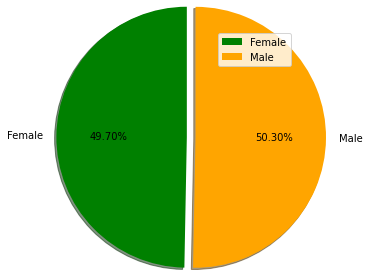

In [35]:
Gender = ['Female','Male'] 
slices = [(dataset['gender'] =='F').sum(), (dataset['gender'] == 'M').sum()] 
colors = ['g', 'orange'] 
plt.pie(slices, labels = Gender, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()

In [36]:
dataset.gender.value_counts()

M    660489
F    652589
Name: gender, dtype: int64

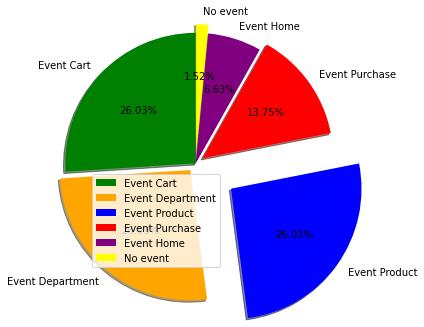

In [37]:
Event = ['Event Cart','Event Department','Event Product','Event Purchase','Event Home','No event'] 
slices = [(dataset['event_type'] =='cart').sum(), (dataset['event_type'] == 'department').sum(),(dataset['event_type'] =='product').sum(), (dataset['event_type'] =='purchase').sum(),(dataset['event_type'] =='home').sum(), (dataset['event_type'] =='no_event').sum(), ] 
colors = ['g', 'orange','b','r', 'purple','yellow']
plt.pie(slices, labels = Event, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1,0.5, 0.1, 0,0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()

In [38]:
dataset.event_type.value_counts()

cart          341844
department    341832
product       341812
purchase      180507
home           87069
no_event       20014
Name: event_type, dtype: int64

In [39]:
dataExcelFinal = dataset

In [40]:
dataExcelFinal['created_at'] = dataExcelFinal['created_at'].astype(str)

In [41]:
dataExcelFinal600rb= dataExcelFinal.loc[0:600000]

In [42]:
dataExcelFinal600rb.to_excel("dataExcelFinal600rb.xlsx",index=False)

In [43]:
dataExcelFinalSisa= dataExcelFinal.loc[600000:1313249]

In [44]:
dataExcelFinalSisa.to_excel("dataExcelFinalSisa.xlsx",index=False)

In [45]:
dataset

,id,gender,user_id,created_at,event_type,label
0,19279,F,19279.0,2022-05-06 09:18:24+00:00,department,Kurang_Tertarik
1,19279,F,19279.0,2022-05-06 11:09:56+00:00,department,Kurang_Tertarik
2,19279,F,19279.0,2022-05-06 09:20:32+00:00,product,Kurang_Tertarik
3,19279,F,19279.0,2022-05-06 11:11:51+00:00,product,Kurang_Tertarik
4,19279,F,19279.0,2022-05-06 09:20:34+00:00,cart,Kurang_Tertarik
...,...,...,...,...,...,...
1313245,43199,F,43199.0,2021-12-16 10:26:07+00:00,product,Kurang_Tertarik
1313246,43199,F,43199.0,2021-04-24 09:33:37+00:00,cart,Kurang_Tertarik
1313247,43199,F,43199.0,2021-12-16 10:26:51+00:00,cart,Kurang_Tertarik
1313248,43199,F,43199.0,2021-04-24 09:36:09+00:00,purchase,Kurang_Tertarik


In [46]:
dataset['created_at'] = dataset['created_at'].astype(str)

In [47]:
dataset['user_id'] = dataset['user_id'].astype(str).replace('\.0', '', regex=True)

In [48]:
#Transormasi Data menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
dataset['id']= le.fit_transform(dataset['id'].values)
dataset['user_id']= le.fit_transform(dataset['user_id'].values)
dataset['gender']= le.fit_transform(dataset['gender'].values)
dataset['created_at']= le.fit_transform(dataset['created_at'].values)
dataset['event_type']= le.fit_transform(dataset['event_type'].values)
dataset['label']= le.fit_transform(dataset['label'].values)

In [50]:
dataset

,id,gender,user_id,created_at,event_type,label
0,19278,0,8262,1112584,1,0
1,19278,0,8262,1113000,1,0
2,19278,0,8262,1112591,4,0
3,19278,0,8262,1113008,4,0
4,19278,0,8262,1112592,0,0
...,...,...,...,...,...,...
1313245,43198,0,29514,742807,4,0
1313246,43198,0,29514,385786,0,0
1313247,43198,0,29514,742809,0,0
1313248,43198,0,29514,385788,5,0


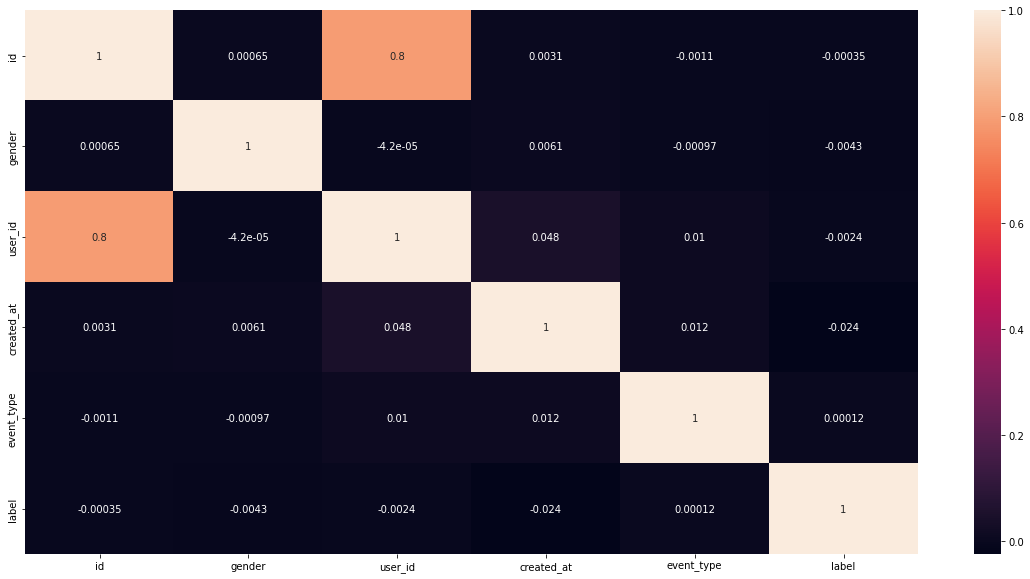

In [51]:
#Visualisasi Heatmap untuk melihat korelasi
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [52]:
dataset.describe()

,id,gender,user_id,created_at,event_type,label
count,1.313078e+06,1.313078e+06,1.313078e+06,1.313078e+06,1.313078e+06,1.313078e+06
mean,5.026737e+04,5.030082e-01,4.080789e+04,6.475332e+05,2.167270e+00,2.947730e-02
std,2.888552e+04,4.999911e-01,2.345407e+04,3.720967e+05,1.888761e+00,1.691402e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.531900e+04,0.000000e+00,2.045000e+04,3.253992e+05,0.000000e+00,0.000000e+00
50%,5.040700e+04,1.000000e+00,4.093200e+04,6.491735e+05,1.000000e+00,0.000000e+00
75%,7.536800e+04,1.000000e+00,6.118100e+04,9.707998e+05,4.000000e+00,0.000000e+00
max,9.999900e+04,1.000000e+00,7.998700e+04,1.269933e+06,5.000000e+00,1.000000e+00


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313078 entries, 0 to 1313249
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   id          1313078 non-null  int64
 1   gender      1313078 non-null  int64
 2   user_id     1313078 non-null  int64
 3   created_at  1313078 non-null  int64
 4   event_type  1313078 non-null  int64
 5   label       1313078 non-null  int64
dtypes: int64(6)
memory usage: 70.1 MB


In [54]:
dataset.event_type.value_counts()

0    341844
1    341832
4    341812
5    180507
2     87069
3     20014
Name: event_type, dtype: int64

In [55]:
dataset.label.value_counts()

0    1274372
1      38706
Name: label, dtype: int64

In [56]:
dataset.gender.value_counts()

1    660489
0    652589
Name: gender, dtype: int64

In [57]:
dataset.id.value_counts()

88752    161
61517    161
86874    156
85683    148
87275    139
        ... 
9668       1
1810       1
2382       1
18597      1
73959      1
Name: id, Length: 100000, dtype: int64

In [58]:
dataset.label.value_counts()

0    1274372
1      38706
Name: label, dtype: int64

In [59]:
dataset.user_id.value_counts()

79987    10017
79986     9997
69972      161
45823      161
68282      156
         ...  
5236         5
4446         5
32452        5
29801        5
7220         5
Name: user_id, Length: 79988, dtype: int64

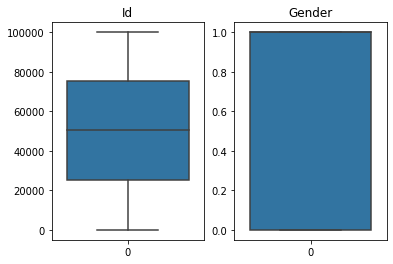

In [60]:
# Outlier Analysis
plt.subplot(1,2,1)
plt.title('Id')
sns.boxplot(data=dataset['id'])

plt.subplot(1,2,2)
plt.title('Gender')
sns.boxplot(data=dataset['gender'])

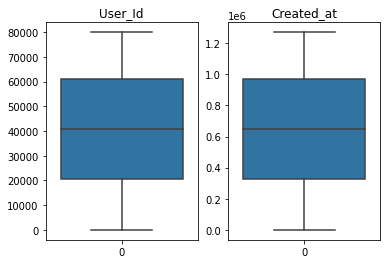

In [61]:
# Outlier Analysis
plt.subplot(1,2,1)
plt.title('User_Id')
sns.boxplot(data=dataset['user_id'])

plt.subplot(1,2,2)
plt.title('Created_at')
sns.boxplot(data=dataset['created_at'])

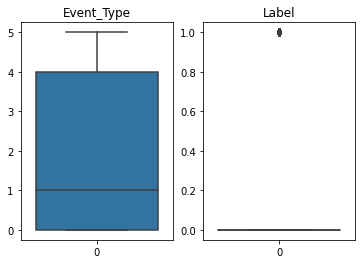

In [62]:
# Outlier Analysis
plt.subplot(1,2,1)
plt.title('Event_Type')
sns.boxplot(data=dataset['event_type'])

plt.subplot(1,2,2)
plt.title('Label')
sns.boxplot(data=dataset['label'])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [64]:
X = dataset.drop(columns='label')
y = dataset['label']

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.1, stratify=y, random_state=11)
X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size=.5, stratify=y_rest, random_state=11)
X_train.shape, X_dev.shape, X_test.shape,y_train.shape,y_dev.shape, y_test.shape


((1181770, 5), (65654, 5), (65654, 5), (1181770,), (65654,), (65654,))

In [65]:
tree_product = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
tree_product.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [66]:
predict_val = tree_product.predict(X_dev)
cm = confusion_matrix(y_dev, predict_val)
print("Confusion Matrix")
print(cm)
akurasi = classification_report(y_dev, predict_val)
print("Tingkat Akurasi Algoritma C4.5")
print("Akurasi :", akurasi)
akurasi = accuracy_score(y_dev, predict_val)
print("Tingkat Akurasi: %d persen" %(akurasi*100))

Confusion Matrix
[[63719     0]
 [ 1769   166]]
Tingkat Akurasi Algoritma C4.5
Akurasi :               precision    recall  f1-score   support

           0       0.97      1.00      0.99     63719
           1       1.00      0.09      0.16      1935

    accuracy                           0.97     65654
   macro avg       0.99      0.54      0.57     65654
weighted avg       0.97      0.97      0.96     65654

Tingkat Akurasi: 97 persen


In [67]:
from jcopml.plot import plot_confusion_matrix

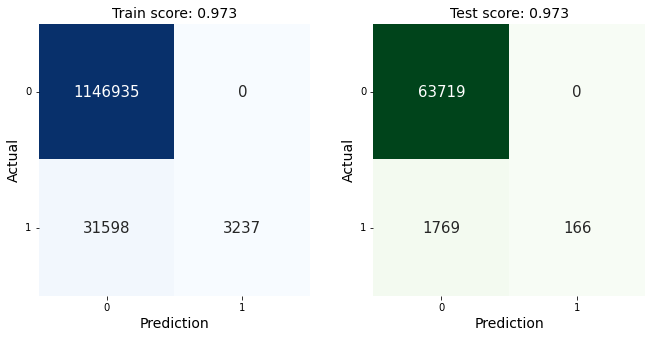

In [68]:
plot_confusion_matrix(X_train, y_train, X_dev, y_dev, tree_product)

In [69]:
predict_test = tree_product.predict(X_test)
cm = confusion_matrix(y_test, predict_test)
print("Confusion Matrix")
print(cm)
akurasi = classification_report(y_test, predict_test)
print("Tingkat Akurasi Algoritma C4.5")
print("Akurasi :", akurasi)
akurasi = accuracy_score(y_test, predict_test)
print("Tingkat Akurasi: %d persen" %(akurasi*100))

Confusion Matrix
[[63718     0]
 [ 1754   182]]
Tingkat Akurasi Algoritma C4.5
Akurasi :               precision    recall  f1-score   support

           0       0.97      1.00      0.99     63718
           1       1.00      0.09      0.17      1936

    accuracy                           0.97     65654
   macro avg       0.99      0.55      0.58     65654
weighted avg       0.97      0.97      0.96     65654

Tingkat Akurasi: 97 persen


**Insights yang diperoleh dari evaluasi model pada data training adalah:**

Semua evaluation metrics sangat bagus, mulai dari accuracy, precision, recall, dan f1-score
Hasil akurasi yang diberikan oleh data test ialah sebesar 97%. Dimana itu menunjukkan bahwa model Decision tree sangat baik menggambarkan klasifikasi pada user menurut label Tertarik dan Kurang Tertarik

In [70]:
from jcopml.plot import plot_confusion_matrix

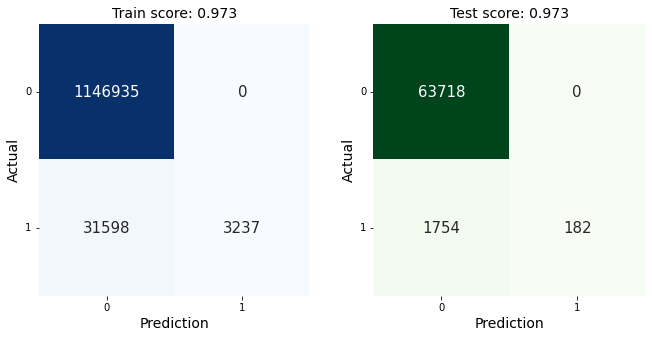

In [71]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, tree_product)

In [72]:
from sklearn.tree import export_graphviz
export_graphviz(tree_product, out_file='airpot.dot' , class_names=["1", "0"],
                feature_names=X.columns, impurity=False, filled=True)

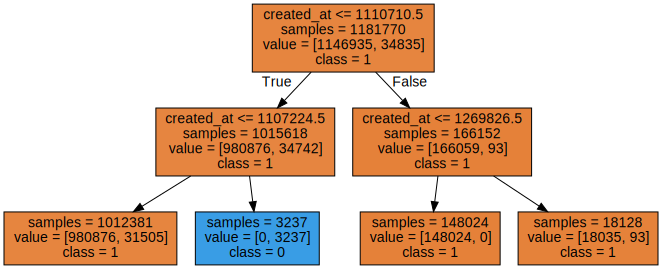

In [73]:
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
with open('airpot.dot') as fig: dot_graph = fig.read()

graphviz.Source(dot_graph)

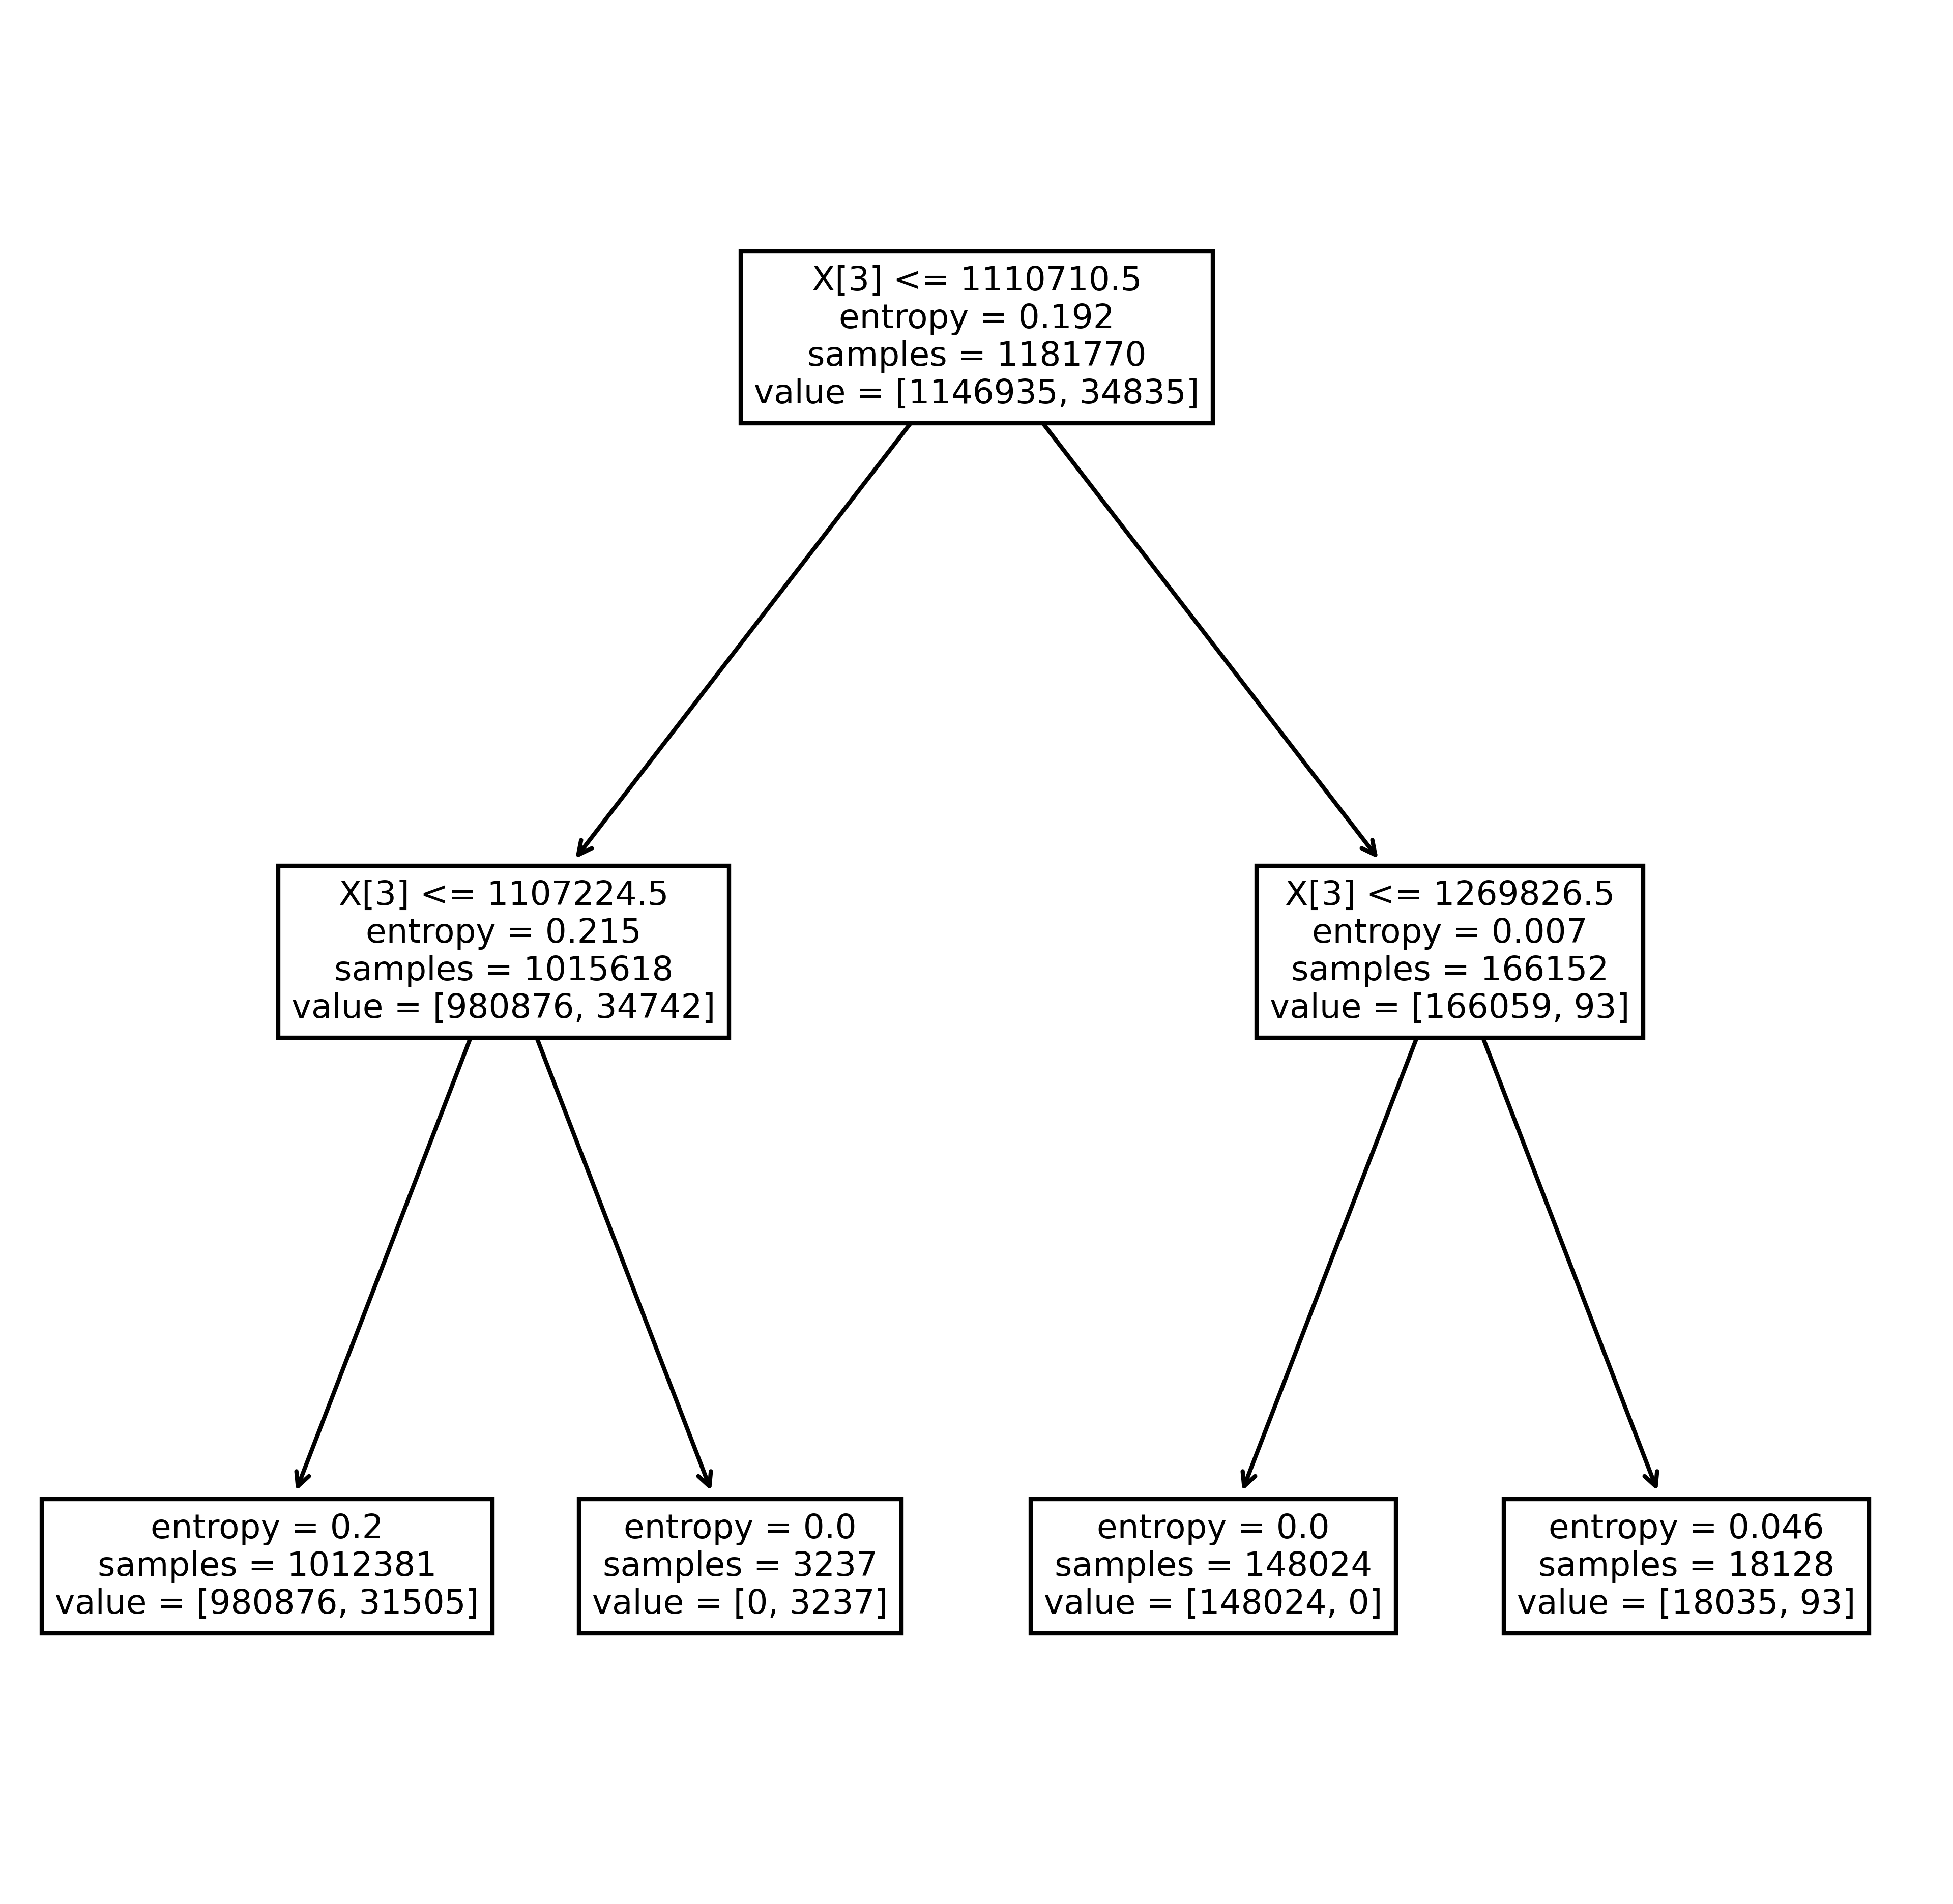

In [74]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize =(8,8), dpi=600)
tree.plot_tree(tree_product)
fig.savefig('Model.png')

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

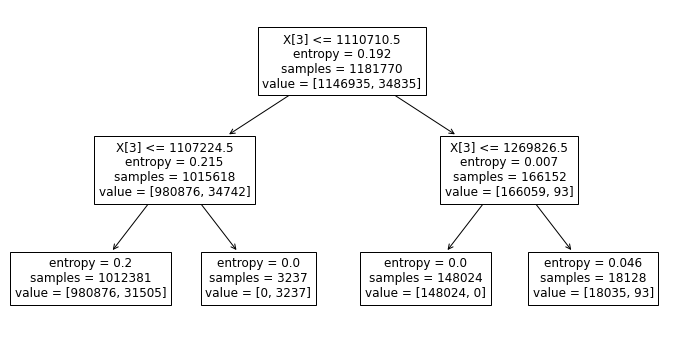

In [76]:
plt.figure(figsize=(12, 6))
plot_tree(tree_product, max_depth=5)
plt.show()

In [77]:
# Putting the feature names and class names into variables
fn = ['id','gender','user_id','created_at','event_type ']
cn = ['Tertarik', 'Kurang_Tertarik']

In [79]:
# Putting the feature names and class names into variables
fn = ['id','gender','user_id','created_at','event_type ']
cn = ['Kurang_Tertarik', 'Tertarik']

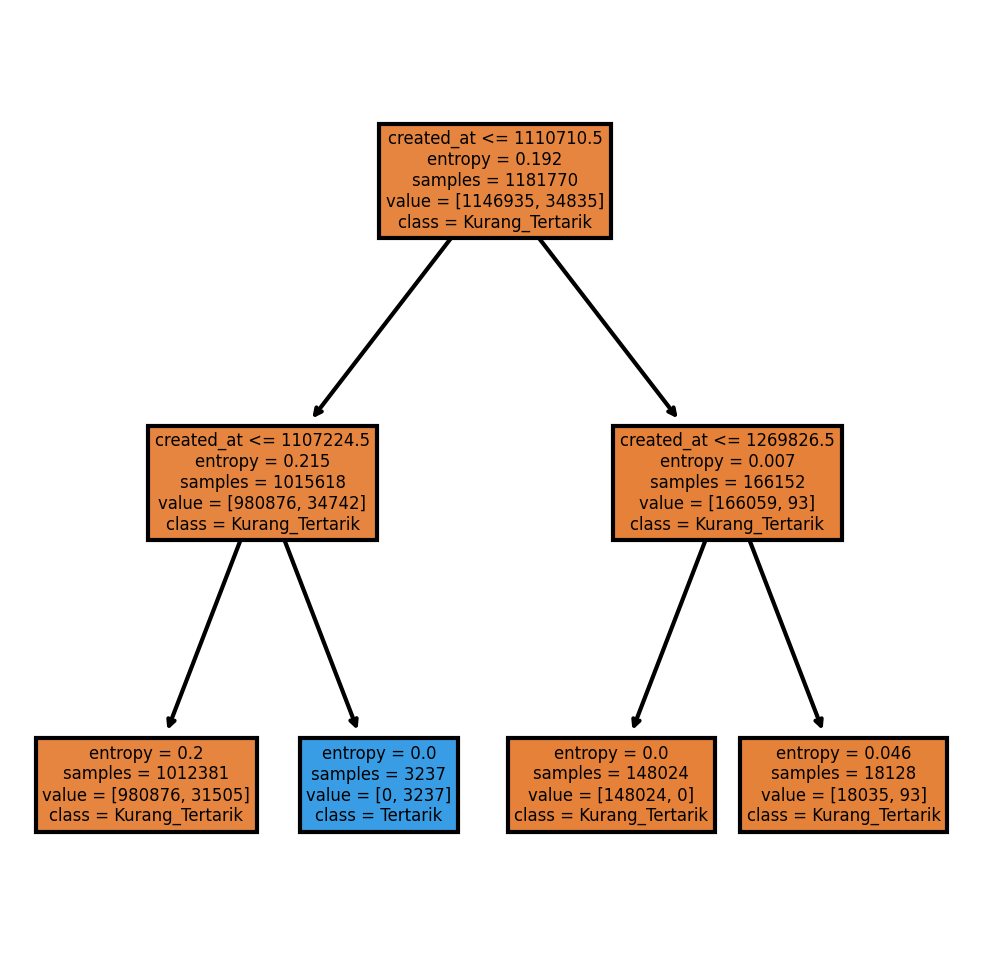

In [80]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(tree_product,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Gambar2.png')

In [1]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(tree_product,
               feature_names = X.columns, 
               class_names=["1", "0"],
               filled = True);
fig.savefig('pred.png')

NameError: ignored